# Energy sums and resolution

In [101]:
import matplotlib
import matplotlib.pyplot as plt
from scipy.optimize import curve_fit
from scipy.special import erf, erfc, gamma
import numpy as np
import pandas as pd
import uproot

In [102]:
dirname = '/data_CMS/cms/bonanomi/'
fname = dirname + 'ntuple_435.root'
key='rechitntupler/hits'

In [103]:
branches = [u'rechit_chip', 'rechit_module', 'rechit_channel',
                u'rechit_energy', 'rechit_layer']

In [104]:
ttree = uproot.open(fname)[key]
df = ttree.pandas.df(branches, entrystop=5000)

In [105]:
df = df.reset_index(level=1,drop=True)
df.index.names = ['event']

In this notebook we are going to study the reconstructed energy deposit in the HGCAL prototype. First of all, we want to create the energy distribution: for a given run (let's say the `435` we are considering here), we reconstruct the energy deposit as the sum of all the `rechit_energy` in a given `event`. It is important to note that this is a first order approximation of the true shower energy, as no clustering is applied and no correction for energy losses or leakage is taken into account. Here we use `groupby` to create the sum of the `rechit_energy`.

In [106]:
esum = df.groupby('event').rechit_energy.sum()

First of all, <font color='green'>plot the histogram of the energy sum distribution</font>. Adjust the binning properly so that you can clearly see the distribution around the peak. Is there any observation you can do about the distribution you are looking at?

Text(0, 0.5, 'Events')

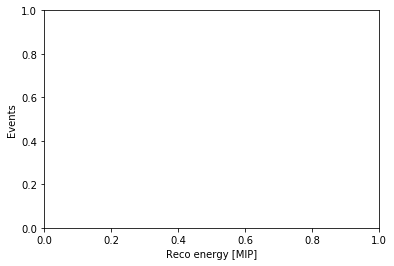

In [161]:
#histogram with proper binning, use histtype = 'step' and color = 'k'
plt.xlabel('Reco energy [MIP]')
plt.ylabel('Events')

Since we are dealing with electromagnetic showers, we should expect the EE part of HGCAL to fully contain the energy deposit. In principle, any energy deposit in the FH layers is either noise or hadrons' contamination to the positrons beam. <font color='green'>Create the energy sum distribution for EE only and compare with the previous one</font>. Plot the two hisograms together (remember to normalize, `density = True` option) and compare them. Do you see any difference? Later in the exercises you will be asked to create this distribution for all the beam energies: also in that case you can check the differences between using the full detector or only the electromagnetic compartment to reconstruct the energy deposit.

In [108]:
def gaussian(x, A, sigma, mu):
    return A/(sigma * np.sqrt(2 * np.pi))*np.exp( - (x - mu)**2 / (2 * sigma**2) )

To measure the energy resolution of the calorimeter, we need to reconctruct the energy deposit distribution and extract its mean energy and standard deviation. In the ideal case of no energy losses and with a full containment of the shower, we would expect en energy spectrum peaking around the true beam energy and with a gaussian shape. In our case, as observed above, we have a small left tail, but the distribution is approximately gaussian. In the previous cell, we have defined our gaussian function, used here below to fit the energy sum distribution:

In [143]:
n, bins = np.histogram(esum, bins = np.linspace(0,30000,300))

In [144]:
bins_c = (bins[:-1]+bins[1:])/2

After having created the histogram, we define the bin centers (**note**: remember that the `np.histogram()` method returns the bins edges and not the bin centers) and we use `curve_fit` to fit the energy sums distribution. In this case we use `p0` to set an initial guess for the fit parameters. More precisely: we use the max bin counts (normalisation constant), the standard deviation and the median of the bins' centers distributions. <font color='green'>When estimating the MPV of a function, i.e. the peak position, it is good to use the median, instead of the mean. Do you know why? Do you know what a **robust** estimator is? </font>

In [145]:
popt, pcov = curve_fit(gaussian, bins_c, n, p0 = [n.max(), np.std(bins_c), np.median(bins_c)])

Text(0, 0.5, 'Events')

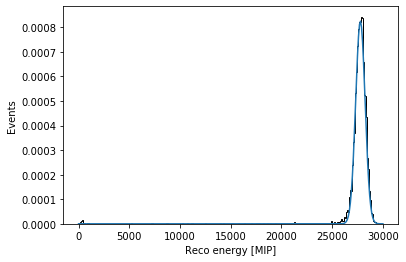

In [146]:
t = plt.hist(esum, density = True, bins = np.linspace(0,30000,300), color = 'k', histtype = 'step')
plt.plot(np.linspace(0,30000,300), gaussian(np.linspace(0,30000,300), *popt), '-')
plt.xlabel('Reco energy [MIP]')
plt.ylabel('Events')

<font color = 'green'> Which is the value of the fit parameters and of their associated uncertainty? </font> In the final analysis we might want to exclude the left tail from the overall fit not to bias the results. <font color = 'green'>Repeat the gaussian fit above using the EE distribution you have created and using an asymmetric interval for the fit. Let's say from 1.0$\sigma$ to 2.5$\sigma$ </font>

# Exercises

In the `dirname` folder you can find the files for all the other beam energies. For each dataset:
 * Open the file as a pandas `df`;
 * Create the energy sum distributions (use EE only);
 * Fit all the distributions with a gaussian around the core and extract the fit parameters;
 * Plot the ratio $\sigma_E /E$ from the fits vs the true beam energy.

## Same fit, different method

In [ ]:
Sampl = 2.198e-01
Noise = 8.210e-03
Linear = 3e-6
h_med = np.median(esum)
energy = 300

h_std = np.sqrt(Noise*Noise + Sampl*Sampl*energy + Linear*Linear*(energy**2))*100.0

In [ ]:
n, bins = np.histogram(esum, bins = np.linspace(20000,30000,100), density = False)
bins_c = (bins[:-1]+bins[1:])/2

In [ ]:
binmax = bins_c[np.argmax(n)]

In [ ]:
popt, pcov = curve_fit(gaussian, bins_c, n, p0 = [n.max(), h_std, binmax])